In [1]:
# A bit of history of the gas problem ⛽️
# Tricked-out cars use gas with a high cetane index, like unleaded 98 petrol in order to avoid delay/advancing in combustible injection (avoiding connecting rod pitting ), but we have started to embrace petrols that add ethanol in their formula, as they are cheaper and they use the same cetane index as more expensive petrol. Without going into further detail (we could write an actual book about this) we think that going green and being modern can be very expensive, as we have seen that cars use more petrol than they used to for each trip.

# Your challenge starts here 📈
# Now it is your turn: can you help us find the best combustible? We have saved some consumption data in a .csv, but… it would be very nice if you could add some more data. You can find data in the repo :-)

# Show us your abilities and make yourself worth the amount of money you'd like to get paid. You have 3 hours to turn the challenge in starting right now! 💸

# What to do?
# You should aim for:
# 1 Exploratory data analysis
# 2 Get to know the domain
# 3 Explore your data
# 4 Clean your data
# 5 Take a look and find connections between data
# 6 Note: Above you have your data set in a folder but for further reference here is the data set source: https://www.kaggle.com/datasets/anderas/car-consume


In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_excel('measurements2.xlsx')

In [4]:
df2 = pd.read_csv('measurements.csv')

In [5]:
display(df.tail(6))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
382,13.6,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN


In [7]:
display(df2.tail(7))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
381,"5,5","3,7",33,"24,5",28,sun,SP98,0,0,1,NaN,NaN
382,"13,6","3,7",33,"24,5",28,sun,SP98,0,0,1,NaN,NaN
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


In [8]:
df2.to_excel('measurements1toexcel.xlsx', index=False)

In [9]:
df3 = pd.concat([df, df2])

In [10]:
df3.to_excel('concatenated.xlsx', index=False)

In [11]:
df3 = df3.drop('refill liters', axis=1)

In [12]:
df3 = df3.drop('refill gas', axis=1)

In [13]:
# Replace "SP98" with 0 and "E10" with 1 in the "gas_type" column
df3['gas_type'] = df3['gas_type'].replace({'SP98': 0, 'E10': 1})

# # Save the  dataframe to a new CSV file
# df3.to_csv('updated.csv', index=False)

In [14]:
df3

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,NaN,1,0,0,0
1,12.0,4.2,30,21.5,13,NaN,1,0,0,0
2,11.2,5.5,38,21.5,15,NaN,1,0,0,0
3,12.9,3.9,36,21.5,14,NaN,1,0,0,0
4,18.5,4.5,46,21.5,15,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,0,0,0,0
384,"16,1","4,3",38,25,31,AC,0,1,0,0
385,16,"3,8",45,25,19,NaN,0,0,0,0
386,"15,4","4,6",42,25,31,AC,0,1,0,0


In [15]:
display(df3.tail(7))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
381,"5,5","3,7",33,"24,5",28,sun,0,0,0,1
382,"13,6","3,7",33,"24,5",28,sun,0,0,0,1
383,16,"3,7",39,"24,5",18,NaN,0,0,0,0
384,"16,1","4,3",38,25,31,AC,0,1,0,0
385,16,"3,8",45,25,19,NaN,0,0,0,0
386,"15,4","4,6",42,25,31,AC,0,1,0,0
387,"14,7",5,25,25,30,AC,0,1,0,0


In [16]:
print(df3['specials'].unique())

[nan 'AC rain' 'AC' 'rain' 'snow' 'AC snow' 'half rain half sun' 'sun'
 'AC sun' 'sun ac' 'ac' 'AC Sun' 'ac rain']


In [17]:
df3 = df3.drop('specials', axis=1)

In [18]:
display(df3.tail(7))

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
381,"5,5","3,7",33,"24,5",28,0,0,0,1
382,"13,6","3,7",33,"24,5",28,0,0,0,1
383,16,"3,7",39,"24,5",18,0,0,0,0
384,"16,1","4,3",38,25,31,0,1,0,0
385,16,"3,8",45,25,19,0,0,0,0
386,"15,4","4,6",42,25,31,0,1,0,0
387,"14,7",5,25,25,30,0,1,0,0


In [19]:
df3 = df3.reset_index(drop=True)

In [20]:
display(df3.tail(7))

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
769,"5,5","3,7",33,"24,5",28,0,0,0,1
770,"13,6","3,7",33,"24,5",28,0,0,0,1
771,16,"3,7",39,"24,5",18,0,0,0,0
772,"16,1","4,3",38,25,31,0,1,0,0
773,16,"3,8",45,25,19,0,0,0,0
774,"15,4","4,6",42,25,31,0,1,0,0
775,"14,7",5,25,25,30,0,1,0,0


In [21]:
mean_values = df3[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].mean()


C:\Users\it-it\AppData\Local\Temp\ipykernel_5384\3456197801.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = df3[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].mean()


In [22]:
mean_values

speed           41.927835
temp_outside    11.358247
gas_type         0.412371
AC               0.077320
rain             0.123711
sun              0.082474
dtype: float64

In [23]:
print(mean_values)

speed           41.927835
temp_outside    11.358247
gas_type         0.412371
AC               0.077320
rain             0.123711
sun              0.082474
dtype: float64


In [25]:
def calculate_price(row):
    if row['gas_type'] == 0:
        return 1.46
    else:
        return 1.38
    df3['price_per_liter'] = df3.apply(calculate_price, axis=1)

In [26]:
df3

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,1,0,0,0
1,12.0,4.2,30,21.5,13,1,0,0,0
2,11.2,5.5,38,21.5,15,1,0,0,0
3,12.9,3.9,36,21.5,14,1,0,0,0
4,18.5,4.5,46,21.5,15,1,0,0,0
...,...,...,...,...,...,...,...,...,...
771,16,"3,7",39,"24,5",18,0,0,0,0
772,"16,1","4,3",38,25,31,0,1,0,0
773,16,"3,8",45,25,19,0,0,0,0
774,"15,4","4,6",42,25,31,0,1,0,0


In [27]:
df3.to_csv('updated.csv', index=False)

In [28]:
df.to_excel('updated.xlsx', index=False)

In [29]:
print(df3.head())

  distance consume  speed temp_inside  temp_outside  gas_type  AC  rain  sun
0     28.0     5.0     26        21.5            12         1   0     0    0
1     12.0     4.2     30        21.5            13         1   0     0    0
2     11.2     5.5     38        21.5            15         1   0     0    0
3     12.9     3.9     36        21.5            14         1   0     0    0
4     18.5     4.5     46        21.5            15         1   0     0    0


In [30]:
# distance is the distance in kilometers  driving
# consume is the consumption in liters per 100 kilometers as seen in the display
# speed is the average speed
# temp_inside is the setting of the heating or "NaN" if it was turned off
# temp_outside is the temperature outside, taken at the end of the ride.
# specials is a remark if it was raining, snowing or if the climatization was on ("AC")
# gas type is the gas type used during the last refill
# AC is one hot encoded, the special "AC". 1 for on, 0 for off.
# rain is one-hot-encoded, the special "rain" and "snow". 1 for it was raining/snowing, 0 for it was good weather.
# I added a new feature in march: sun. This means it was sunny enough outside so that the car felt warm when i was getting into it. It's sad but this is the first month where i needed it. On the other hand it means that we missed nothing until now. :-)


In [37]:
df4 = pd.read_excel('concatenated4.xlsx')

In [38]:
df4

,distance,consume,speed,temp_inside,temp_outside,price_per_liter,AC,rain,sun,gas_type,amount_per_consumption,amount_per_km,temp_spread
0,28,5,26,21.5,12,1.38,0,0,0,0,6.900,0.246429,9.5
1,12,4.2,30,21.5,13,1.38,0,0,0,0,5.796,0.483000,8.5
2,11.2,5.5,38,21.5,15,1.38,0,0,0,0,7.590,0.677679,6.5
3,12.9,3.9,36,21.5,14,1.38,0,0,0,0,5.382,0.417209,7.5
4,18.5,4.5,46,21.5,15,1.38,0,0,0,0,6.210,0.335676,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,16,"3,7",39,"24,5",18,1.46,0,0,0,1,5.402,0.337625,6.5
748,"16,1","4,3",38,25,31,1.46,1,0,0,1,6.278,0.389938,-6.0
749,16,"3,8",45,25,19,1.46,0,0,0,1,5.548,0.346750,6.0
750,"15,4","4,6",42,25,31,1.46,1,0,0,1,6.716,0.436104,-6.0


In [39]:
df4.to_csv('E10vsSP98_fuel.csv', index=False)

In [40]:
df5 = pd.read_excel('concatenated4.xlsx')

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from IPython.display import display #, HTML
from patsy import dmatrices
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colorbar 
import os
import seaborn as sns
%matplotlib inline
#%matplotlib notebook


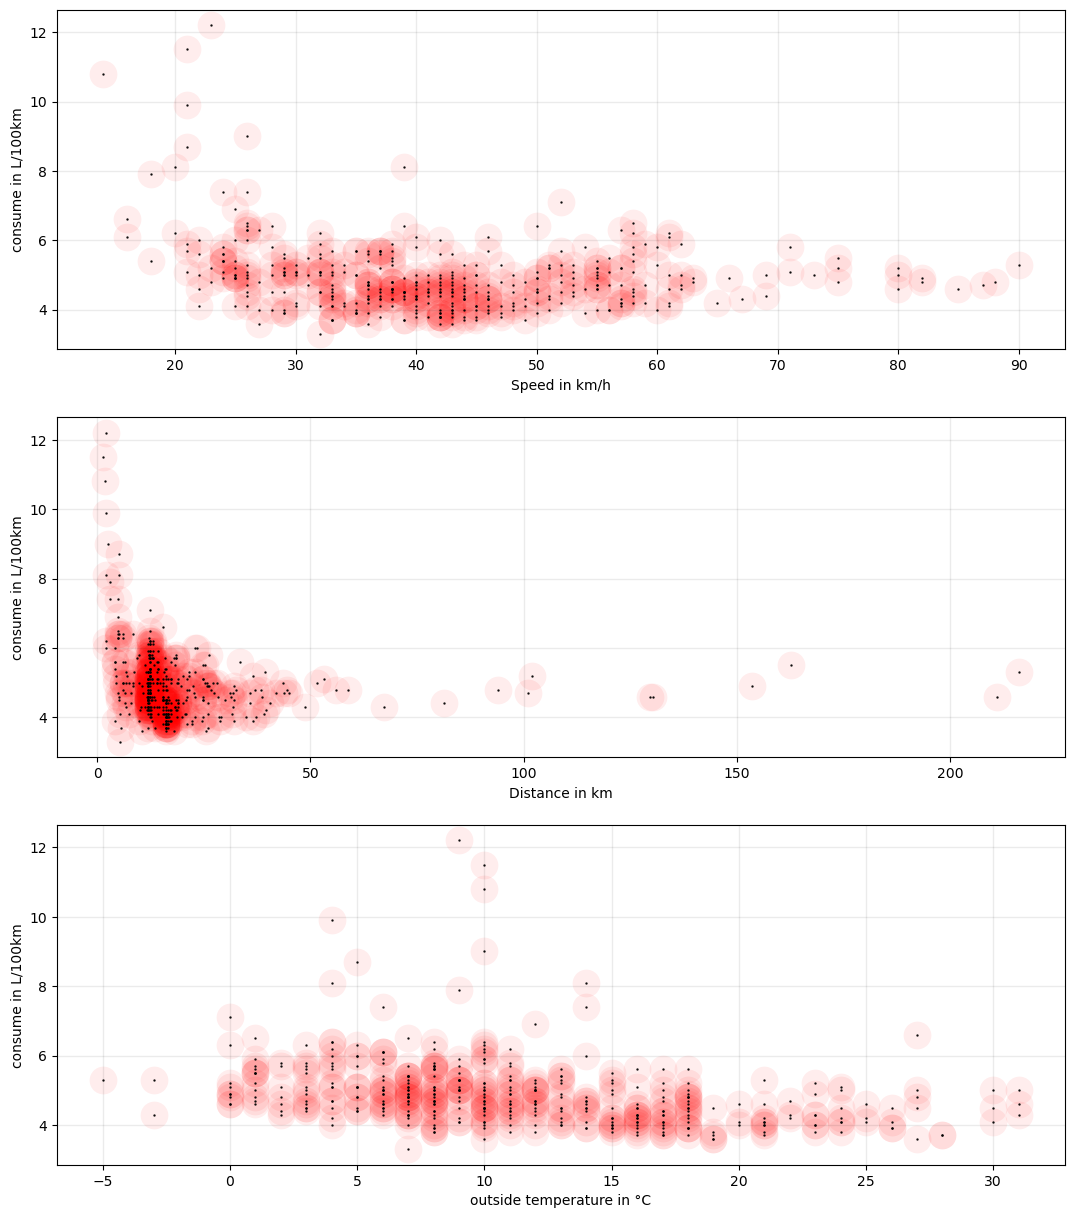

In [43]:
%matplotlib inline
fig, axarr = plt.subplots(3,1)
fig.set_size_inches(w=13, h=15)
red_halo = (1., 0, 0, 0.07)
# plot of speed
axarr[0].scatter(df.speed.values, df.consume.values, color=red_halo, s=400, marker='o', linewidths=0)
axarr[0].scatter(df.speed.values, df.consume.values, color='#000000', s=0.5, marker='o', alpha=.9)
axarr[0].grid(color='#000000', linestyle='-', linewidth=1, alpha=0.08)
axarr[0].set_xlabel('Speed in km/h')
axarr[0].set_ylabel('consume in L/100km')

#plot of distances
axarr[1].scatter(df.distance.values, df.consume.values, color=red_halo, s=400, marker='o',linewidths=0)
axarr[1].scatter(df.distance.values, df.consume.values, color='#000000', s=0.5, marker='o', alpha=.9)
axarr[1].grid(color='#000000', linestyle='-', linewidth=1, alpha=0.08)
axarr[1].set_xlabel('Distance in km')
axarr[1].set_ylabel('consume in L/100km')

#plot of outside temperature
axarr[2].scatter(df.temp_outside.values, df.consume.values, color=red_halo, s=400, marker='o',linewidths=0)
axarr[2].scatter(df.temp_outside.values, df.consume.values, color='#000000', s=0.5, marker='o', alpha=.9)
axarr[2].grid(color='#000000', linestyle='-', linewidth=1, alpha=0.08)
axarr[2].set_xlabel('outside temperature in °C')
text = axarr[2].set_ylabel('consume in L/100km')

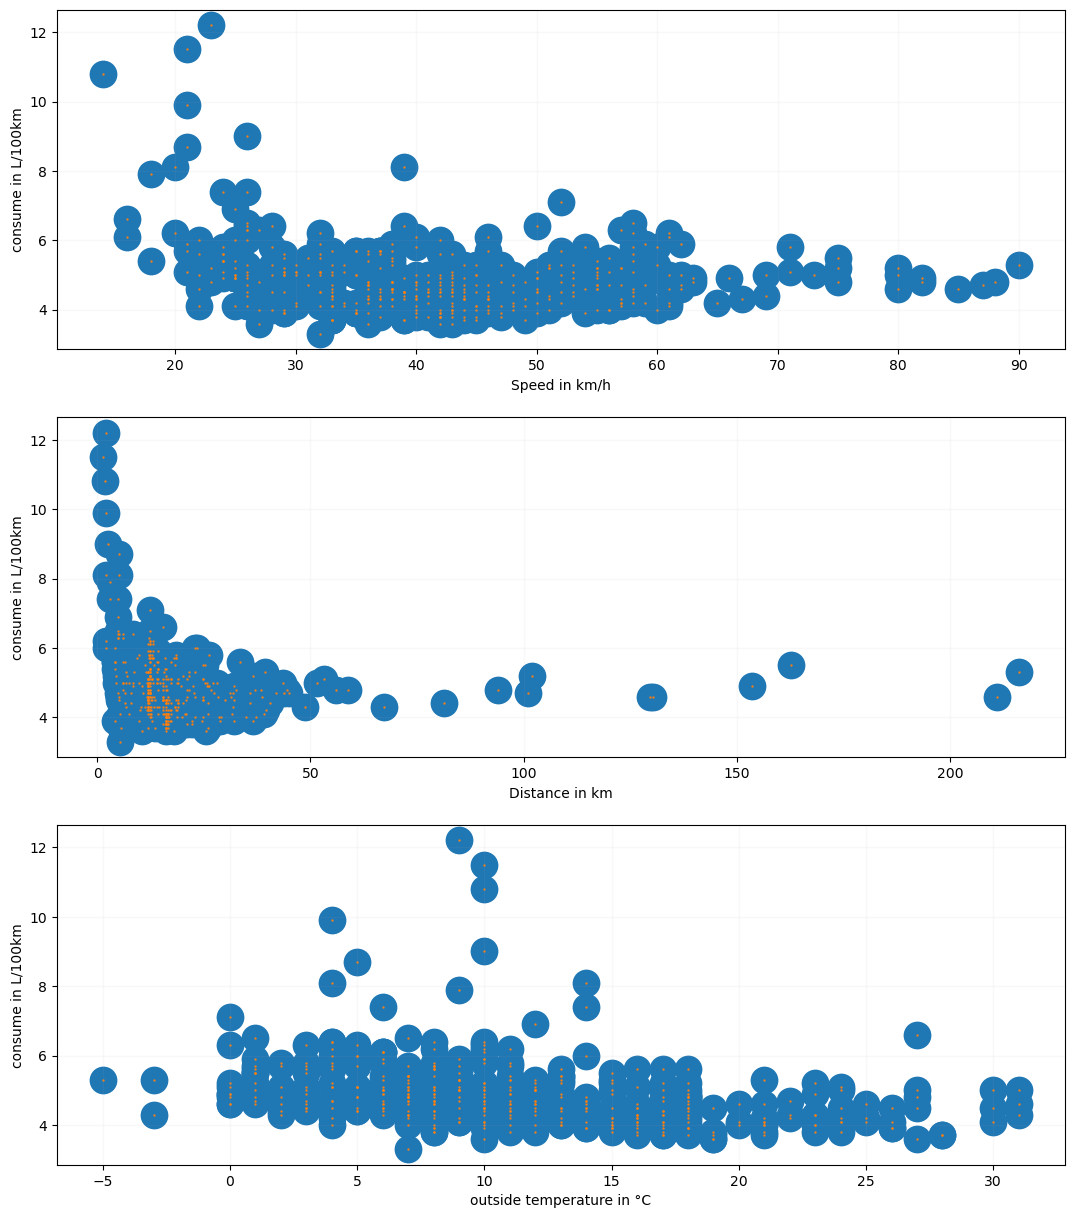

In [45]:
%matplotlib inline
fig, axarr = plt.subplots(3,1)
fig.set_size_inches(w=13, h=15)
red_halo = (1., 0, 0, 0.07)
# plot of speed
axarr[0].scatter(df.speed.values, df.consume.values, s=400, marker='o', linewidths=0)
axarr[0].scatter(df.speed.values, df.consume.values, s=0.5, marker='o', alpha=.9)
axarr[0].grid(linestyle='-', linewidth=1, alpha=0.08)
axarr[0].set_xlabel('Speed in km/h')
axarr[0].set_ylabel('consume in L/100km')

#plot of distances
axarr[1].scatter(df.distance.values, df.consume.values, s=400, marker='o',linewidths=0)
axarr[1].scatter(df.distance.values, df.consume.values, s=0.5, marker='o', alpha=.9)
axarr[1].grid(linestyle='-', linewidth=1, alpha=0.08)
axarr[1].set_xlabel('Distance in km')
axarr[1].set_ylabel('consume in L/100km')

#plot of outside temperature
axarr[2].scatter(df.temp_outside.values, df.consume.values, s=400, marker='o',linewidths=0)
axarr[2].scatter(df.temp_outside.values, df.consume.values, s=0.5, marker='o', alpha=.9)
axarr[2].grid(linestyle='-', linewidth=1, alpha=0.08)
axarr[2].set_xlabel('outside temperature in °C')
text = axarr[2].set_ylabel('consume in L/100km')

In [46]:
# indicator if the heating was not used at all
df['heating_off']=df['temp_inside'].isnull()
df['heating_off']=df['heating_off'].apply(float)
# if the heating was turned completely off, replace the inside temperature by the outside temperature
df['temp_inside'].fillna(df['temp_outside'], inplace=True)
# get the temperature difference
df['temp_diff'] = df['temp_inside'] - df['temp_outside']
df['temp_diff_square'] = df['temp_diff']**2
# add the square and cube of the speed to the frame
df['speedsquare'] = df['speed']**2  # 5% better accuracy
df['speedcube'] =  df['speed']**3  # 1% better accuracy

# translate the gas type to something machine readable
def gastype(in_string):
    '''gas type in, integer out'''
    if in_string == "E10":
        return 0
    else:
        return 1
df['gas_type_num']= df['gas_type'].apply(gastype)
print(df.groupby(by='gas_type')['consume'].mean().round(2))

gas_type
E10     4.93
SP98    4.90
Name: consume, dtype: float64


In [47]:
# use interactive or passive graphic format
%matplotlib inline
# %matplotlib notebook


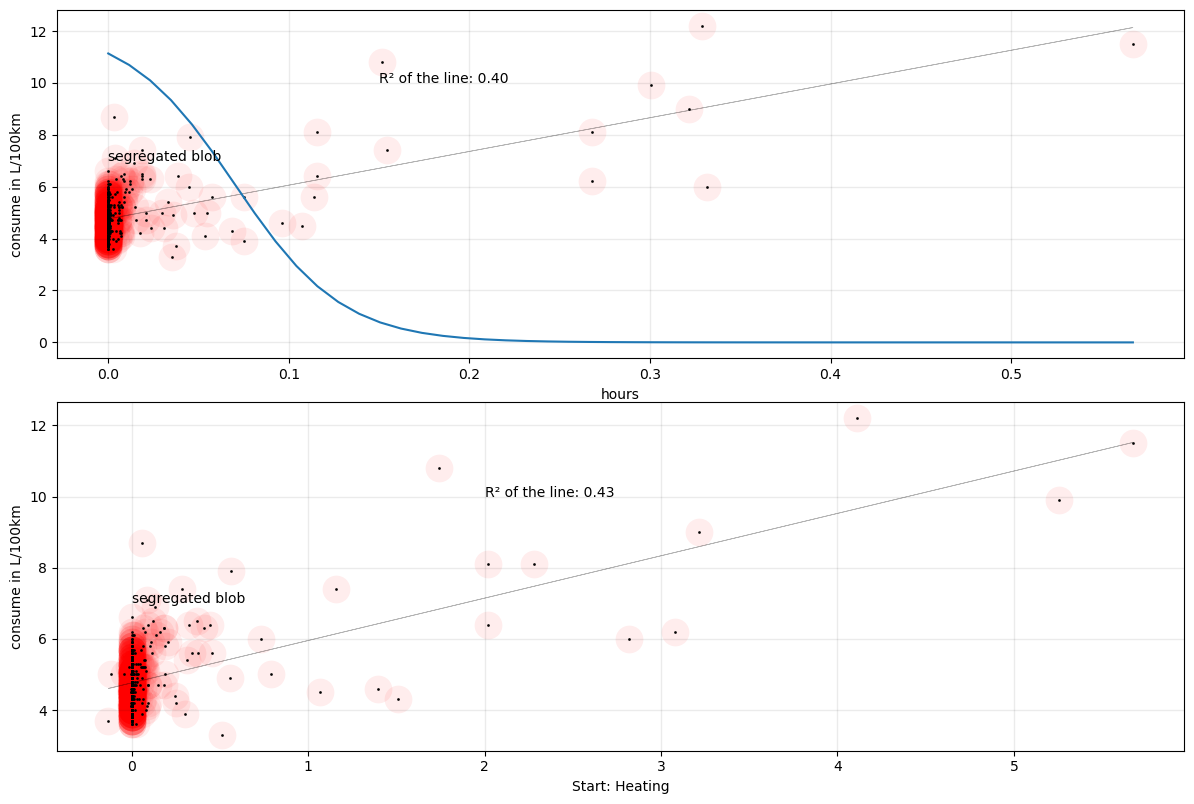

In [48]:
from ipywidgets import *
# slope get down rather fast.
# delay: after 7% of an hour, equals 5 minutes, cut off.
def sigmo(x, slope = 33.5, delay = 0.07):
    return 1 / (1 + np.exp( (x-delay)* slope))

df['time_h'] = (df['distance']/df['speed'])
df['startphase'] = sigmo(df['time_h'])

#check the additional worth of it
rgr = LinearRegression()
rgr.fit(df.startphase.values.reshape(-1, 1), df.consume.values)
regression_fit = 'R² of the line: {:.2f}'.format(rgr.score(df.startphase.values.reshape(-1, 1), df.consume.values))

fig, axarr = plt.subplots(2,1)
fig.set_size_inches(w=12, h=8)
fig.tight_layout()
alpha = 0.05
# plot of startphase
line0, = axarr[0].plot(df.startphase.values,  df.startphase.values*rgr.coef_[0]+rgr.intercept_, 
                       color='#000000', alpha=.3, linewidth=0.5)
text0 = axarr[0].text(0.15, 10, regression_fit)
halo0 = axarr[0].scatter(df.startphase.values, df.consume.values, color=red_halo, s=400, marker='o',linewidths=0)
poin0 = axarr[0].scatter(df.startphase.values, df.consume.values, color='#000000', s=1, marker='o', alpha=.9)
x = np.linspace(0,df.startphase.values.max())
sigm0, = axarr[0].plot(x, sigmo(x)*df.consume.values.max())
axarr[0].grid(color='#000000', linestyle='-', linewidth=1, alpha=0.08)
axarr[0].set_xlabel('hours')
axarr[0].set_ylabel('consume in L/100km')
axarr[0].text(0.0, 7, 'segregated blob')


# heating costs extra in the startphase, later not so much
df['start_heating'] = df['startphase'] * df['temp_diff'] 
#check the additional worth of it
rgr = LinearRegression()
rgr.fit(df.start_heating.values.reshape(-1, 1), df.consume.values)
regression_fit = 'R² of the line: {:.2f}'.format(rgr.score(df.start_heating.values.reshape(-1, 1), df.consume.values))

#plot of start_heating
line1, = axarr[1].plot(df.start_heating.values, df.start_heating.values*rgr.coef_[0]+rgr.intercept_, 
                       color='#000000', alpha=.3, linewidth=0.5)
text1 = axarr[1].text(2, 10, regression_fit)
halo1 = axarr[1].scatter(df.start_heating.values, df.consume.values, color=red_halo, s=400, marker='o',linewidths=0)
poin1 = axarr[1].scatter(df.start_heating.values, df.consume.values, color='#000000', s=1, marker='o', alpha=.9)
axarr[1].grid(color='#000000', linestyle='-', linewidth=1, alpha=0.08)
axarr[1].set_xlabel('Start: Heating')
axarr[1].text(0, 7, 'segregated blob')
text = axarr[1].set_ylabel('consume in L/100km')

def update(slope, delay):
    df['startphase'] = sigmo(df['time_h'], slope=slope, delay=delay)
    rgr = LinearRegression()
    rgr.fit(df.startphase.values.reshape(-1, 1), df.consume.values)
    score = rgr.score(df.startphase.values.reshape(-1, 1), df.consume.values)
    #text0.set_position(0.4, 10)
    text0.set_text('R² of the line: {:.2f}'.format(score))
    line0.set_data(df.startphase.values, df.startphase.values*rgr.coef_[0]+rgr.intercept_)
    halo0.set_offsets(np.c_[df.startphase.values, df.consume.values])
    poin0.set_offsets(np.c_[df.startphase.values, df.consume.values])
    
    x = np.linspace(0,df.startphase.values.max())
    sigm0.set_data(x, sigmo(x, slope=slope, delay=delay)*df.consume.values.max())

    df['start_heating'] = df['startphase'] * df['temp_diff'] 
    #check the additional worth of it
    rgr = LinearRegression()
    rgr.fit(df.start_heating.values.reshape(-1, 1), df.consume.values)
    score = rgr.score(df.start_heating.values.reshape(-1, 1), df.consume.values)

    text1.set_text('R² of the line: {:.2f}'.format(score))
    line1.set_data(df.start_heating.values, df.start_heating.values*rgr.coef_[0]+rgr.intercept_)
    halo1.set_offsets(np.c_[df.start_heating.values, df.consume.values])
    poin1.set_offsets(np.c_[df.start_heating.values, df.consume.values])
    
    fig.canvas.draw()

def plot_interactive():
    slope_w = widgets.FloatSlider(description='slope', value=33.5, min=0, max=200, step=0.01, width=600,
                                 layout = Layout(width='60%', height='40px'))
    delay_w = widgets.FloatSlider(description='delay', value=0.070, min=0, max=0.2, step=0.001,
                                 layout = Layout(width='60%', height='40px'))
    interact(update, slope=slope_w, delay=delay_w)

fig.canvas.draw()

In [49]:
plot_interactive()

interactive(children=(FloatSlider(value=33.5, description='slope', layout=Layout(height='40px', width='60%'), …

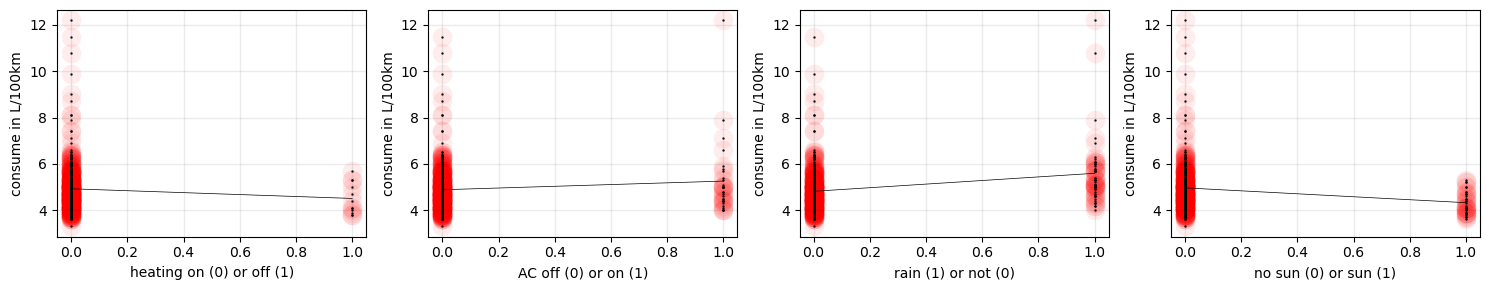

In [50]:
%matplotlib inline
rgr = LinearRegression()
fig, ax = plt.subplots(1,4)
fig.set_size_inches(w=15, h=3)
X=np.array([0,1.])
# plot of speed
rgr.fit(df.heating_off.values.reshape(-1, 1), df.consume.values)
ax[0].plot(X,  X*rgr.coef_[0]+rgr.intercept_, color='#000000', alpha=1, linewidth=0.5)
ax[0].scatter(df.heating_off.values, df.consume.values, color=red_halo, s=200, marker='o', linewidths=0)
ax[0].scatter(df.heating_off.values, df.consume.values, color='#000000', s=0.5, marker='o', alpha=.9)
ax[0].grid(color='#000000', linestyle='-', linewidth=1, alpha=0.08)
ax[0].set_xlabel('heating on (0) or off (1)')
ax[0].set_ylabel('consume in L/100km')

rgr.fit(df.AC.values.reshape(-1, 1), df.consume.values)
ax[1].plot(X,  X*rgr.coef_[0]+rgr.intercept_, color='#000000', alpha=1, linewidth=0.5)
ax[1].scatter(df.AC.values, df.consume.values, color=red_halo, s=200, marker='o', linewidths=0)
ax[1].scatter(df.AC.values, df.consume.values, color='#000000', s=0.5, marker='o', alpha=.9)
ax[1].grid(color='#000000', linestyle='-', linewidth=1, alpha=0.08)
ax[1].set_xlabel('AC off (0) or on (1)')
ax[1].set_ylabel('consume in L/100km')

rgr.fit(df.rain.values.reshape(-1, 1), df.consume.values)
ax[2].plot(X,  X*rgr.coef_[0]+rgr.intercept_, color='#000000', alpha=1, linewidth=0.5)
ax[2].scatter(df.rain.values, df.consume.values, color=red_halo, s=200, marker='o', linewidths=0)
ax[2].scatter(df.rain.values, df.consume.values, color='#000000', s=0.5, marker='o', alpha=.9)
ax[2].grid(color='#000000', linestyle='-', linewidth=1, alpha=0.08)
ax[2].set_xlabel('rain (1) or not (0)')
text = ax[2].set_ylabel('consume in L/100km')

rgr.fit(df.sun.values.reshape(-1, 1), df.consume.values)
ax[3].plot(X,  X*rgr.coef_[0]+rgr.intercept_, color='#000000', alpha=1, linewidth=0.5)
ax[3].scatter(df.sun.values, df.consume.values, color=red_halo, s=200, marker='o', linewidths=0)
ax[3].scatter(df.sun.values, df.consume.values, color='#000000', s=0.5, marker='o', alpha=.9)
ax[3].grid(color='#000000', linestyle='-', linewidth=1, alpha=0.08)
ax[3].set_xlabel('no sun (0) or sun (1)')
text = ax[3].set_ylabel('consume in L/100km')
fig.tight_layout()

In [51]:
# make a list of chosen predictors
prediction_values = ['distance','start_heating', 'startphase', 'time_h',
                     'speed', 'speedsquare', 'speedcube', 
                     'temp_diff', 'temp_diff_square', 'temp_outside', 
                     'heating_off', 'AC', 'rain', 'sun']
##############################################################
# in theory, the regression needs scaled data. However, 
# using scaled data had no effect. So scaling is not used today.
# scaler = StandardScaler()
# X_scale = scaler.fit_transform(df[prediction_values].values) 

# make numpy arrays for sklearn
X = df[prediction_values].values
Y = df['consume'].values
Y_gas = df['gas_type_num'].values

print('The result after crossfitting two regressions to get the effect of gas sorts:')
def crossfit_regression(X, Y, Y_gas, estimator, estimator_kwargs={}):
    ''' If you use the same code three times, make a function.
    '''
    # apply regression
    rgr = estimator(**estimator_kwargs)
    rgr.fit(X, Y)

    # apply again, this time trained on gas type
    rgr_gas = estimator(**estimator_kwargs)
    rgr_gas.fit(X, Y_gas)

    # get the residuals (the not-yet-explained variance left in the data)
    Y_residuals = Y - rgr.predict(X)
    X_gas_residuals = Y - rgr_gas.predict(X)

    # fit the residuals to get the influence of the gas type
    # reshape(-1,1) is necessary since scikit 19 if you have a single feature
    rgr_inference = estimator(**estimator_kwargs)
    rgr_inference.fit(X_gas_residuals.reshape(-1,1), Y_residuals)
    if hasattr(rgr_inference, 'coef_'):
        difference = rgr_inference.coef_[0] # there is only one coef, but given as list of one. :-)
    if hasattr(rgr_inference, 'estimator_'):
        difference = rgr_inference.estimator_.coef_[0]
    score = rgr.score(X, Y)
    print('The difference in consumption between E10 and SP98 is {:.2f} liter.'.format(difference))
    print('And R² of the model: {:.3f}'.format(score))    
    return difference, rgr, score

result, rgr, score= crossfit_regression(X, Y, Y_gas, LinearRegression, estimator_kwargs={})
result_list = []
result_list.append({'estimator':'linear', 'difference':result, 'R²': score})

The result after crossfitting two regressions to get the effect of gas sorts:
The difference in consumption between E10 and SP98 is 0.36 liter.
And R² of the model: 0.649


In [52]:
print('The importance of the other factors (F-Values)')
from sklearn.feature_selection import f_regression
F, pval = f_regression(X, Y)
predictors_df = pd.DataFrame(columns=prediction_values)
predictors_df.loc['F-value of predictor'] = F
print(predictors_df.round(2).transpose())

The importance of the other factors (F-Values)
                  F-value of predictor
distance                          6.53
start_heating                   268.28
startphase                      231.57
time_h                           12.60
speed                            21.14
speedsquare                       8.56
speedcube                         2.92
temp_diff                        42.11
temp_diff_square                 32.42
temp_outside                     44.28
heating_off                       1.90
AC                                3.64
rain                             25.32
sun                              11.58


In [53]:
# prepare the first two steps in the old way... as i already have the code :-)
rgr = LinearRegression()
rgr.fit(X, Y)

# apply again, this time trained on gas type
rgr_gas = LinearRegression()
rgr_gas.fit(X, Y_gas)

# get the residuals (the not-yet-explained variance left in the data)
Y_residuals = Y - rgr.predict(X)
X_gas_residuals = Y - rgr_gas.predict(X)

# prepare dataframe for statsmodels
residuals = pd.DataFrame(Y_residuals, columns=['consume'])
residuals['E10']=X_gas_residuals

# fit regression in statsmodels format.
# it's like sklearn rgr.fit(E10, consume)
results = smf.ols('consume ~ E10', data=residuals).fit()

# get the result out of the vast array of available values
consume = results.conf_int().loc['E10']

# assuming the difference is the beta of E10: attention, this
# is true only if the factor E10 is completely independent
difference = results.params[1]

# results.bse contains the standard error - if you want other confidence intervals...
print("The car uses {:.2f} L/100km more with E10. The 95% interval is between {:.2f} and {:.2f}".format(
                    difference, consume[0], consume[1]))

The car uses 0.36 L/100km more with E10. The 95% interval is between 0.31 and 0.40


In [54]:
from sklearn.linear_model import ElasticNet
# l1_ratio = 1 is like Lasso, l1_ratio = 0 is like ridge.
# I would like mostly ridge, however, to make sure that useless features disappear,
# I keep a little bit of Lasso.
# alpha determines the cutoff. The smaller alpha, the less coefficients are used.
kwargs = {'alpha':1., 'l1_ratio':0.05, 'max_iter':10000}

difference, rgr, score = crossfit_regression(X, Y, Y_gas, estimator=ElasticNet, estimator_kwargs=kwargs)
result_list.append({'estimator':'elastic net', 'difference':difference, 'R²': rgr.score(X, Y)})

The difference in consumption between E10 and SP98 is 0.33 liter.
And R² of the model: 0.364


In [55]:
for i, word in enumerate(prediction_values):
    print('influence of {:s}: {:.4f}'.format(word, rgr.coef_[i]))

influence of distance: -0.0116
influence of start_heating: 0.1342
influence of startphase: 0.0000
influence of time_h: -0.0000
influence of speed: -0.1431
influence of speedsquare: 0.0014
influence of speedcube: 0.0000
influence of temp_diff: 0.0040
influence of temp_diff_square: 0.0007
influence of temp_outside: -0.0272
influence of heating_off: -0.0000
influence of AC: 0.0000
influence of rain: 0.0009
influence of sun: -0.0000


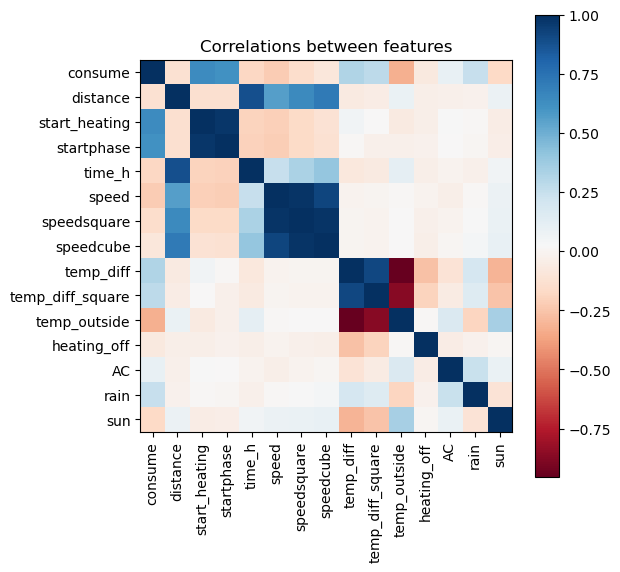

In [56]:
#correlate
corr = df[['consume'] + prediction_values].corr()

#show correlation in colors
fig, ax = plt.subplots(1,1)
fig.set_size_inches(w=6, h=6)
ax.set_title('Correlations between features')
image = plt.imshow(corr, cmap = cm.RdBu)
cb = fig.colorbar(image)
pos = range(len(['consume'] + prediction_values))
plt.xticks(pos, ['consume'] + prediction_values, rotation=90)
catch = plt.yticks(pos, ['consume'] + prediction_values)

In [57]:
prediction_values = ['distance', 'startphase', 'time_h',
                     'speed', 'speedsquare', 
                     'temp_diff', 'temp_diff_square', 'temp_outside', 
                      'AC', 'rain', 'sun']

In [58]:
# replace X
X = df[prediction_values].values
difference, rgr, score = crossfit_regression(X, Y, Y_gas, LinearRegression)
result_list.append({'estimator':'linear with updated features', 'difference':difference, 'R²': score})

The difference in consumption between E10 and SP98 is 0.41 liter.
And R² of the model: 0.593


In [59]:
from sklearn.linear_model import (TheilSenRegressor, RANSACRegressor, HuberRegressor)
print('TheilSen')
difference, rgr, score = crossfit_regression(X, Y, Y_gas, TheilSenRegressor)
result_list.append({'estimator':'TheilSen', 'difference':difference, 'R²': score})

TheilSen
The difference in consumption between E10 and SP98 is 0.49 liter.
And R² of the model: 0.403


In [60]:
# residual_threshold is the border to classify data as "data" or "outlier"
# the standard deviation is a bit more open than the standard Mean Average Deviation
# min_samples tells the algorithm how many datapoints have to be taken 
# stop_score tells him he can stop searching when his R² is better than that.
kwargs = {'min_samples':0.75, 'residual_threshold':Y.std(), 'max_trials':1000}
print('RANSAC')
difference, rgr, score = crossfit_regression(X, Y, Y_gas, estimator=RANSACRegressor, estimator_kwargs=kwargs)
datapoint_mask = rgr.inlier_mask_ #to check the excluded points later
result_list.append({'estimator':'RANSAC', 'difference':difference, 'R²': score})
print('RANSAC made {} different fits.'.format(rgr.n_trials_))

RANSAC
The difference in consumption between E10 and SP98 is 0.52 liter.
And R² of the model: 0.578
RANSAC made 1000 different fits.


In [61]:
# Huber does not ignore outliers, instead they get a smaller weight determined by alpha.
# epsilon says how far from the standard a value should be to be classified as outlier.
# small epsi makes for less points selected, big epsi includes more points.
kwargs = {'alpha':0.01, 'epsilon':1.35}
print('HuberRegressor')
difference, rgr, score = crossfit_regression(X, Y, Y_gas, estimator=HuberRegressor, estimator_kwargs=kwargs)
result_list.append({'estimator':'HuberRegressor', 'difference':difference, 'R²': score})

HuberRegressor
The difference in consumption between E10 and SP98 is 0.81 liter.
And R² of the model: -0.136


C:\Users\it-it\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\it-it\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [62]:
df.loc[~datapoint_mask, ['consume']+prediction_values]

,consume,distance,startphase,time_h,speed,speedsquare,temp_diff,temp_diff_square,temp_outside,AC,rain,sun
5,6.4,8.3,1.469998e-02,0.166000,50,2500,11.5,132.25,10,0,0,0
12,5.9,12.3,2.802741e-03,0.208475,59,3481,11.5,132.25,10,0,0,0
37,7.4,4.9,6.133493e-03,0.188462,26,676,15.5,240.25,6,0,0,0
39,6.5,12.3,2.434418e-03,0.212069,58,3364,14.5,210.25,7,0,0,0
40,4.0,12.4,1.440011e-03,0.225455,55,3025,14.5,210.25,7,1,1,0
44,3.3,5.4,1.321402e-02,0.168750,32,1024,14.5,210.25,7,0,0,0
45,9.9,2.0,1.940107e-01,0.095238,21,441,17.5,306.25,4,0,0,0
54,6.4,6.1,1.940077e-03,0.217857,28,784,13.5,182.25,8,0,0,0
57,6.2,12.3,3.663280e-03,0.201639,61,3721,13.5,182.25,8,0,0,0
60,7.9,2.9,1.775861e-02,0.161111,18,324,12.5,156.25,9,1,1,0


C:\Users\it-it\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\it-it\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


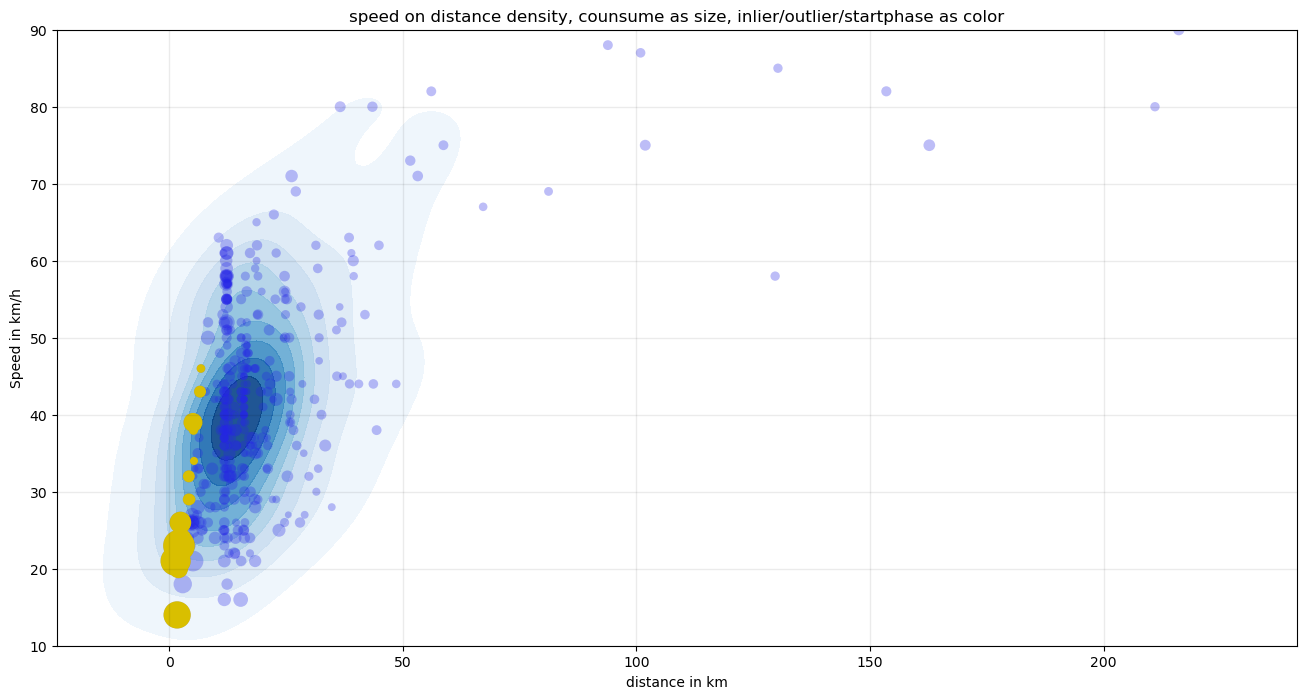

In [63]:
fig, axarr = plt.subplots(1,1)
fig.set_size_inches(w=16, h=8)
red_halo = (1, 0.1, 0.1, 0.9)
blue_halo = (0.15, 0.15, 0.9, 0.3)
yellow = (0.85, 0.75, 0, 1)
outliers = df.loc[~datapoint_mask]
inliers = df.loc[datapoint_mask]
startphase = df.loc[df['startphase'].values>0.02]

# plot of speed
axarr = sns.kdeplot(inliers['distance'], inliers['speed'],
                  cmap=cm.Blues, alpha=0.9, shade=True, shade_lowest=False)
axarr.scatter(df.distance.values, df.speed.values, 
              color=blue_halo, s=(df.consume.values)**2.5, marker='o', linewidths=0)
axarr.scatter(startphase['distance'], startphase['speed'].values,
              color=yellow, s=(startphase.consume.values)**2.5, marker='o', linewidths=0)
axarr.scatter(outliers.distance.values, outliers.speed.values, 
              color=red_halo, s=(outliers.consume.values)**2.3, marker='x', linewidths=0)
axarr.grid(color='#000000', linestyle='-', linewidth=1, alpha=0.08)
#axarr.set_xlim(0, 85)
axarr.set_ylim(10, 90)

axarr.set_ylabel('Speed in km/h')
axarr.set_xlabel('distance in km')
text = plt.title('speed on distance density, counsume as size, inlier/outlier/startphase as color',y=1)

C:\Users\it-it\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\it-it\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


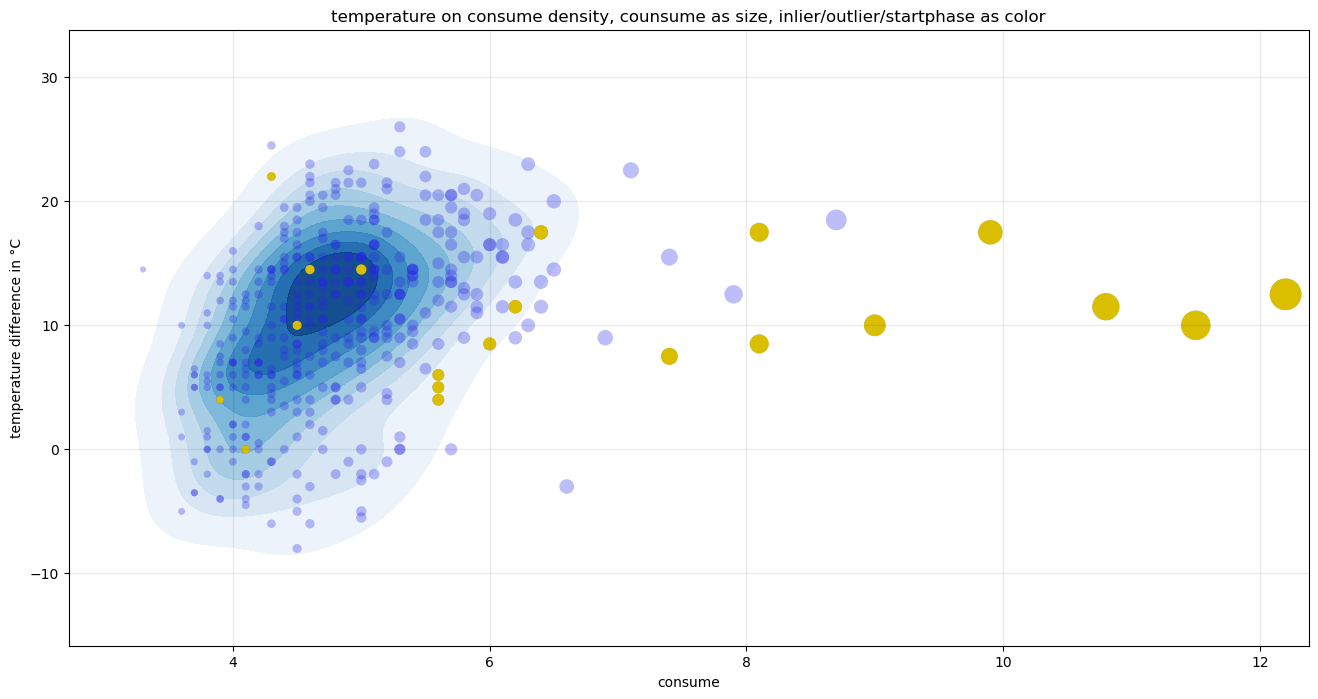

In [64]:
fig, axarr = plt.subplots(1,1)
fig.set_size_inches(w=16, h=8)

# plot of speed
axarr = sns.kdeplot(inliers['consume'], inliers['temp_diff'], 
                  cmap=cm.Blues, alpha=0.95, shade=True, shade_lowest=False)
axarr.scatter(df['consume'], df['temp_diff'].values,
              color=blue_halo, s=(df.consume.values)**2.5, marker='o', linewidths=0)
axarr.scatter(startphase['consume'], startphase['temp_diff'].values,
              color=yellow, s=(startphase.consume.values)**2.5, marker='o', linewidths=0)
axarr.scatter(outliers['consume'], outliers['temp_diff'].values, 
              color=red_halo, s=(outliers.consume.values)**2.3, marker='x', linewidths=0)
axarr.grid(color='#000000', linestyle='-', linewidth=1, alpha=0.08)

axarr.set_ylabel('temperature difference in °C')
axarr.set_xlabel('consume')
text = plt.title('temperature on consume density, counsume as size, inlier/outlier/startphase as color',y=1)

In [65]:
X = df.loc[datapoint_mask, prediction_values].values
Y = df.loc[datapoint_mask,'consume'].values
Y_gas = df.loc[datapoint_mask,'gas_type_num'].values

difference, rgr, score = crossfit_regression(X, Y, Y_gas, estimator=LinearRegression)
result_list.append({'estimator':'linear with updated features and cleaned data', 'difference':difference, 'R²': score})

The difference in consumption between E10 and SP98 is 0.38 liter.
And R² of the model: 0.611


In [66]:
pd.DataFrame(result_list).round(2)


,estimator,difference,R²
0,linear,0.36,0.65
1,elastic net,0.33,0.36
2,linear with updated features,0.41,0.59
3,TheilSen,0.49,0.40
4,RANSAC,0.52,0.58
5,HuberRegressor,0.81,-0.14
6,linear with updated features and cleaned data,0.38,0.61


In [67]:
# According to data analysis using Statsmodels, the result falls within a 95% confidence interval
# between 0.32 and 0.44 for all regressions that were fit using the traditional OLS method. 
#However, the three data-selecting regressions did not agree, with TheilSen 
#consistently delivering the same result while Ransac varied slightly each time. 
#The HuberRegressor regression method was unsuccessful in providing a result.
# The robust regression methods produced the most significant findings, 
#indicating that using E10 fuel is on average €1 more expensive than using SP98 fuel per 100km. 
#The smaller results, ranging from a 50 cent increase to a €1 increase, were derived from 
#simple linear regressions. Based on these findings, the analyst's personal conclusion 
#is that the result is more likely to fall on the 0.7 liter side, as indicated 
#by the robust regression analyses.

In [68]:
# The aviation shows that the weather conditions, the time when the air conditioning is used and not used influences the 
# amount of fuel consumption as well as above graphs. 

# The more heating is used in the car, the more fuel is being consumed.
# The bigger the spread between outside and inside temperature is, the more fuel is being consumed. 
# If you employ me, I can use my meteorological, physical, musical, mathematical, chemical  
#knowledge from my past job experience in order to save big amount of money 
# to your company and to optimize the overall process.

# I can not only use my mathematical skills, but also correlation skills to 
# optimize the process management of your company. 

# the following ressources have been used to accomplish this task:


In [ ]:
# https://en.wikipedia.org/wiki/Cetane_index
# https://en.wikipedia.org/wiki/Cetane_Improver
# https://www.kaggle.com/code/anderas/prius-gas-type-regressions-best-side
# https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.researchgate.net%2Fpublication%2F315117829%2Ffigure%2Ffig7%2FAS%3A613444445274118%401523267961098%2F7-Increase-in-fuel-consumption-for-various-speeds-for-75-and-50-of-the-recommended.png&imgrefurl=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2F7-Increase-in-fuel-consumption-for-various-speeds-for-75-and-50-of-the-recommended_fig7_315117829&tbnid=8o295Rx5WI4KnM&vet=12ahUKEwjpwK_j0Zr9AhXnnv0HHVs0AdQQMygHegUIARC4AQ..i&docid=GYeZ3zBs4Y5QuM&w=813&h=631&q=fuel%20consumption%20depending%20on%20pressure&ved=2ahUKEwjpwK_j0Zr9AhXnnv0HHVs0AdQQMygHegUIARC4AQ

# https://www.google.com/imgres?imgurl=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2F9%2F91%2FAviation_Efficiency_%2528RPK_per_kg_CO2%2529.svg%2F800px-Aviation_Efficiency_%2528RPK_per_kg_CO2%2529.svg.png&imgrefurl=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FFuel_economy_in_aircraft&tbnid=eWyWJOFeasBl1M&vet=12ahUKEwjpwK_j0Zr9AhXnnv0HHVs0AdQQMygQegUIARDKAQ..i&docid=toMyZgT5aizrMM&w=800&h=737&q=fuel%20consumption%20depending%20on%20pressure&ved=2ahUKEwjpwK_j0Zr9AhXnnv0HHVs0AdQQMygQegUIARDKAQ
# https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.euromotor.org%2Fpluginfile.php%2F844%2Fmod_resource%2Fcontent%2F0%2Fpres2%2Fsingle-slides%2Fimg13.jpg&imgrefurl=https%3A%2F%2Fwww.euromotor.org%2Fmod%2Fresource%2Fview.php%3Fid%3D21087&tbnid=TWTN3ov3YexroM&vet=12ahUKEwjpwK_j0Zr9AhXnnv0HHVs0AdQQMygcegUIARDiAQ..i&docid=dynGgbrqaLBi8M&w=512&h=354&q=fuel%20consumption%20depending%20on%20pressure&ved=2ahUKEwjpwK_j0Zr9AhXnnv0HHVs0AdQQMygcegUIARDiAQ
# https://en.wikipedia.org/wiki/Fuel_economy_in_automobiles
# https://fueleconomy.gov/
